
# Profiling Taspen Life's Customer
Oleh : Rahmafitri Arum Sabarina, Rizkika M, M. Iqbal





### Business Problem Understanding

    Context
PT TASPEN (Persero) mengelola anak perusahaan yang bergerak di bidang asuransi yaitu PT Asuransi Jiwa Taspen atau yang dikenal dengan Taspen Life. Taspen Life memiliki empat produk unggulan yaitu Taspen Smart Save, Taspen Dwiguna Sejahtera, Taspen Proteksi Beasiswa, dan Taspen Bright Life. Saat ini pemasaran produk Taspen Life dilakukan dengan berbagai cara salah satunya dipasarkan saat pembayaran klaim peserta di Taspen. 

Target : 


0 : Tidak mengikuti / mengambil produk Taspen Life

1 : Mengikuti / mengambil produk Taspen Life




    Problem Statement
Proses penawaran produk Taspen Life memakan waktu, biaya, dan sumber daya jika perusahaan menargetkan semua peserta sebagai target penjualan Taspen Life. Taspen perlu meningkatkan efisiensi dalam proses penawaran produk dengan mengetahui profil peserta seperti apa yang berminat terhadap produk Taspen Life. 





    Goals
Maka berdasarkan permasalahan tersebut, Taspen ingin memiliki tool yang mampu memprediksi kemungkinan seorang peserta akan mengikuti produk proteksi tambahan yang tersedia dari Taspen Life, sehingga dapat memfokuskan pemasaran pada peserta yang bersedia dengan harapan pemasaran yang dilakukan Taspen dapat efektif dan efisien. Selain itu, Taspen ingin mengetahui faktor/variabel apa yang membuat seseorang peserta mau mengikuti produk proteksi tampahan dengan harapan Taspen dapat membuat perencanaan lebih baik dalam pemasaran kandidat potensial. 





    Analytic Approach
Menganalisis data untuk menemukan pola yang membedakan peserta bersedia untuk mendapat proteksi tambahan dan tidak bersedia mendapat proteksi tambahan dari Taspen Life. Kemudian selanjutnya, kita akan membangun model klasifikasi yang akan membantu perusahaan untuk memprediksi probabilitas seorang kandidat/peserta ingin/bersedia untuk mendapat proteksi tambahan dari Taspen Life. 





    Metric Evaluation
| **Attribute** | **Tidak mengambil Polis** | **Mengambil Polis** |
| --- | --- | --- |
|  **Tidak mengambil Polis** | **True Negative(TN)** | **False Positive (FN)** |
|      | Model memprediksikan peserta tidak mengambil polis dan peserta memang tidak mengambil polis | Model memprediksikan peserta mengambil polis padahal peserta tidak mengambil polis |
| **Mengambil Polis** | **False Negative (FN)** | **True Postive (TP)** |
|      | Model memprediksikan bahwa peserta tidak mengambil polis padahal peserta mengambil polis | Model memprediksikan bahwa peserta  mengambil polis dan peserta memang  mengambil polis |





    Data Dictionary

 - Dataset merupakan data klaim Taspen di Tahun 2021.
- Setiap baris data merepresentasikan informasi terkait klaim yang dilakukan di Taspen dan keikutsertaan terhadap produk Taspen Life.


| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| ID_PESERTA | Object | Listing ID |
| KODE_JENIS_KLAIM | Object | Jenis klaim yang diajukan di Taspen terdiri dari B1 = Pensiun dan C1 = Meninggal Aktif |
| TGL_KLAIM | Integer | Tanggal klaim yang diajukan di Taspen |
| TGL_POSTING | Object | Tanggal posting keuangan saat pengajuan klaim di Taspen |
| TGL_LAHIR | Object | Tanggal lahir peserta |
| TMT_KERJA | Object | Tanggal pertama peserta bekerja |
| TMT_TASPEN | Object | Tanggal pertama menjadi peserta di Taspen |
| ID_JENIS_KELAMIN | Integer | Jenis kelamin peserta terdiri dari 1 = Laki-laki dan 2 = Perempuan |
| KODE_PANGKAT | Object | Pangkat terakhir peserta Taspen di institusi tempat bekerja |
| KODE_KEDUDUKAN | Integer | Jabatan terakhir peserta Taspen di institusi tempat bekerja |
| KODE_JENIS_PEGAWAI | Integer | Jenis peserta |
| KODE_KELOMPOK_PESERTA | Integer | Number of reviews |
| TGLPMK | Object | Tanggal pensiun / meninggal / keluar |
| BUP | Integer | Umur saat mencapai usia pensiun |
| THP | Integer | Take home pay |
| MASA_KERJA | Integer | Lama peserta bekerja sebagai ASN |
| JUMLAH_ISTRI | Integer | Banyaknya istri yang diakui oleh negara |
| JUMLAH_ANAK | Integer | Banyaknya anak yang diakui oleh negara|
| KODE_CABANG | Integer | Kode untuk cabang |
| ID_TASPEN_LIFE_PRODUK | Integer | Produk Taspen Life yang digunakan |



In [1]:
# Import libraries

# Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing
import missingno as msno
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from scipy.stats import shapiro

# Model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, StackingClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb

# Model selection
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score,recall_score, precision_score, f1_score, precision_recall_curve, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline

# Imbalanced treatment
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTENC
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from sklearn.metrics import fbeta_score, balanced_accuracy_score, brier_score_loss

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

# Set max columns
# pd.set_option('display.max_columns', None)

In [2]:
# Load dataset
df = pd.read_csv('DATASET B1 C1 J1 2021.csv')
df.head()

,ID_PESERTA,KODE_JENIS_KLAIM,TGL_KLAIM,TGL_POSTING,TGL_LAHIR,TMT_KERJA,TMT_TASPEN,ID_JENIS_KELAMIN,KODE_PANGKAT,KODE_KEDUDUKAN,KODE_JENIS_PEGAWAI,KODE_KELOMPOK_PESERTA,TGLPMK,BUP,THP,MASA_KERJA,JUMLAH_ISTRI,JUMLAH_ANAK,KODE_CABANG,ID_TASPEN_LIFE_PRODUK
0,52A93B316F97425C1700B06CFB291994,B1,2021-08-12 11:59:32.855,2021-08-13 07:59:53.005,1963-06-17,1983-12-01,1983-12-01,1,3D,410,6,1,2021-07-01,58,5276700,32,1,0,302,NaN
1,469E38316F97425C1700B06CFB291994,B1,2021-04-14 09:19:37.154,2021-04-15 07:37:47.320,1963-03-12,1997-03-01,1997-03-01,1,4A,416,6,1,2021-04-01,65,4881252,23,1,2,701,NaN
2,66A9E5316F97425C1700B06CFB291994,C1,2021-04-12 10:56:12.371,2021-04-14 08:54:16.823,1964-12-29,1989-03-01,1989-03-01,1,4A,851,1,1,2021-02-04,60,5357202,28,1,1,300,NaN
3,5C1E23316F97425C1700B06CFB291994,B1,2021-01-12 10:08:35.708,2021-01-13 09:48:54.056,1960-12-20,1993-03-01,1993-03-01,1,4A,851,1,1,2021-01-01,60,5102496,3,1,0,402,NaN
4,AD4DF8316F97425C1700B06CFB291994,B1,2021-02-09 14:09:14.349,2021-02-11 08:18:04.902,1960-10-30,1988-03-01,1988-03-01,1,4A,851,1,1,2020-11-01,60,5525922,30,1,2,300,NaN


In [3]:
df.columns

Index(['ID_PESERTA', 'KODE_JENIS_KLAIM', 'TGL_KLAIM', 'TGL_POSTING',
       'TGL_LAHIR', 'TMT_KERJA', 'TMT_TASPEN', 'ID_JENIS_KELAMIN',
       'KODE_PANGKAT', 'KODE_KEDUDUKAN', 'KODE_JENIS_PEGAWAI',
       'KODE_KELOMPOK_PESERTA', 'TGLPMK', 'BUP', 'THP', 'MASA_KERJA',
       'JUMLAH_ISTRI', 'JUMLAH_ANAK', 'KODE_CABANG', 'ID_TASPEN_LIFE_PRODUK'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138137 entries, 0 to 138136
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID_PESERTA             138137 non-null  object 
 1   KODE_JENIS_KLAIM       138137 non-null  object 
 2   TGL_KLAIM              138137 non-null  object 
 3   TGL_POSTING            138137 non-null  object 
 4   TGL_LAHIR              138137 non-null  object 
 5   TMT_KERJA              138137 non-null  object 
 6   TMT_TASPEN             138137 non-null  object 
 7   ID_JENIS_KELAMIN       138137 non-null  int64  
 8   KODE_PANGKAT           138137 non-null  object 
 9   KODE_KEDUDUKAN         138137 non-null  int64  
 10  KODE_JENIS_PEGAWAI     138137 non-null  int64  
 11  KODE_KELOMPOK_PESERTA  138137 non-null  int64  
 12  TGLPMK                 138126 non-null  object 
 13  BUP                    138137 non-null  int64  
 14  THP                    138137 non-nu

### Exploratory Data Analysis ###

`General information`

In [5]:
def preview(df):
    '''
    Returns a summary of attributes including dtype, proportion of missing values,
    number of unique values, and sample.
    '''
    
    df_check = []
    for i in df.columns:
        df_check .append([
                    i,
                    df[i].dtype,
                    df[i].isna().sum(),
                    round(df[i].isna().sum() / len(df) * 100, 2),
                    df[i].nunique(),
                    df[i].drop_duplicates().values])
        
    return pd.DataFrame(df_check, columns=['Features', 'DataType', 'Null', 'Proportion', 'Uniques', 'UniqueSample'])

In [6]:
preview(df)

,Features,DataType,Null,Proportion,Uniques,UniqueSample
0,ID_PESERTA,object,0,0.00,137016,"[52A93B316F97425C1700B06CFB291994, 469E38316F9..."
1,KODE_JENIS_KLAIM,object,0,0.00,2,"[B1, C1]"
2,TGL_KLAIM,object,0,0.00,138126,"[2021-08-12 11:59:32.855, 2021-04-14 09:19:37...."
3,TGL_POSTING,object,0,0.00,137197,"[2021-08-13 07:59:53.005, 2021-04-15 07:37:47...."
4,TGL_LAHIR,object,0,0.00,8569,"[1963-06-17, 1963-03-12, 1964-12-29, 1960-12-2..."
5,TMT_KERJA,object,0,0.00,518,"[1983-12-01, 1997-03-01, 1989-03-01, 1993-03-0..."
6,TMT_TASPEN,object,0,0.00,455,"[1983-12-01, 1997-03-01, 1989-03-01, 1993-03-0..."
7,ID_JENIS_KELAMIN,int64,0,0.00,2,"[1, 2]"
8,KODE_PANGKAT,object,0,0.00,30,"[3D, 4A, 4E, 4C, 4D, 4B, 3C, 2B, 3B, 3A, 2D, 2..."
9,KODE_KEDUDUKAN,int64,0,0.00,181,"[410, 416, 851, 104, 841, 415, 203, 607, 722, ..."


Terdapat missing value di beberapa feature yaitu TGL PMK dan ID_TASPEN_LIFE_PRODUK, maka kita melakukan proses yang lainnya seperti memperbaiki data dan membuatnya menjadi siap pakai. Data yang sudah siap pakai untuk dilakukan analisa terhadap masalah dan pembuatan model machine learning. 

In [7]:
df.describe()

,ID_JENIS_KELAMIN,KODE_KEDUDUKAN,KODE_JENIS_PEGAWAI,KODE_KELOMPOK_PESERTA,BUP,THP,MASA_KERJA,JUMLAH_ISTRI,JUMLAH_ANAK,KODE_CABANG,ID_TASPEN_LIFE_PRODUK
count,138137.000000,138137.000000,138137.000000,138137.000000,138137.000000,1.381370e+05,138137.000000,138137.000000,138137.000000,138137.000000,894.000000
mean,1.421480,275.321587,5.240993,1.005914,59.060426,4.947743e+06,64.247689,0.704105,0.522959,374.870571,3.022371
std,0.493798,175.717302,1.833007,0.096568,3.242622,8.338278e+05,379.302923,0.456446,0.726993,191.033534,0.333888
min,1.000000,100.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,100.000000,3.000000
25%,1.000000,100.000000,6.000000,1.000000,58.000000,4.507328e+06,24.000000,0.000000,0.000000,203.000000,3.000000
50%,1.000000,401.000000,6.000000,1.000000,60.000000,5.115660e+06,30.000000,1.000000,0.000000,400.000000,3.000000
75%,2.000000,401.000000,6.000000,1.000000,60.000000,5.557530e+06,32.000000,1.000000,1.000000,506.000000,3.000000
max,2.000000,993.000000,19.000000,3.000000,75.000000,6.727368e+06,25031.000000,1.000000,2.000000,704.000000,8.000000


`Rename Colomn ID_TASPEN_LIFE_PRODUK`

Guna mempermudah penulisan kolom di ID_TASPEN_LIFE_PRODUK, maka dilakukan perubahan terhadap kolom menjadi Taspen_Life.

In [8]:
df.rename(columns={'ID_TASPEN_LIFE_PRODUK': 'TaspenLife'}, inplace=True)

In [9]:
df.head()

,ID_PESERTA,KODE_JENIS_KLAIM,TGL_KLAIM,TGL_POSTING,TGL_LAHIR,TMT_KERJA,TMT_TASPEN,ID_JENIS_KELAMIN,KODE_PANGKAT,KODE_KEDUDUKAN,KODE_JENIS_PEGAWAI,KODE_KELOMPOK_PESERTA,TGLPMK,BUP,THP,MASA_KERJA,JUMLAH_ISTRI,JUMLAH_ANAK,KODE_CABANG,TaspenLife
0,52A93B316F97425C1700B06CFB291994,B1,2021-08-12 11:59:32.855,2021-08-13 07:59:53.005,1963-06-17,1983-12-01,1983-12-01,1,3D,410,6,1,2021-07-01,58,5276700,32,1,0,302,NaN
1,469E38316F97425C1700B06CFB291994,B1,2021-04-14 09:19:37.154,2021-04-15 07:37:47.320,1963-03-12,1997-03-01,1997-03-01,1,4A,416,6,1,2021-04-01,65,4881252,23,1,2,701,NaN
2,66A9E5316F97425C1700B06CFB291994,C1,2021-04-12 10:56:12.371,2021-04-14 08:54:16.823,1964-12-29,1989-03-01,1989-03-01,1,4A,851,1,1,2021-02-04,60,5357202,28,1,1,300,NaN
3,5C1E23316F97425C1700B06CFB291994,B1,2021-01-12 10:08:35.708,2021-01-13 09:48:54.056,1960-12-20,1993-03-01,1993-03-01,1,4A,851,1,1,2021-01-01,60,5102496,3,1,0,402,NaN
4,AD4DF8316F97425C1700B06CFB291994,B1,2021-02-09 14:09:14.349,2021-02-11 08:18:04.902,1960-10-30,1988-03-01,1988-03-01,1,4A,851,1,1,2020-11-01,60,5525922,30,1,2,300,NaN


NaN pada kolom `Taspen_Life` adalah peserta yang tidak mengambil polis. Kelompok 4 sepakat menggantinya dengan 0.

In [10]:
df['TaspenLife'] = df['TaspenLife'].fillna(0)

Data pada kolom `Taspen_Life` diubah keseluruhannya dalam type data integer.

In [11]:
df['TaspenLife'] = df['TaspenLife'].astype('int64')

Kolom `Taspen_Life` :

Kode 3 (Taspen Dwiguna Sejahtera disingkat TDS),

Kode 8 (Taspen Proteksi Beasiswa disingkat TPB),

Kelompok 4 sepakat mengganti kode 3 & 8 menjadi kelas 1 (Mengambil Polis).

In [12]:
df['TaspenLife'] = df['TaspenLife'].replace([3, 8], 1)
df.head()

,ID_PESERTA,KODE_JENIS_KLAIM,TGL_KLAIM,TGL_POSTING,TGL_LAHIR,TMT_KERJA,TMT_TASPEN,ID_JENIS_KELAMIN,KODE_PANGKAT,KODE_KEDUDUKAN,KODE_JENIS_PEGAWAI,KODE_KELOMPOK_PESERTA,TGLPMK,BUP,THP,MASA_KERJA,JUMLAH_ISTRI,JUMLAH_ANAK,KODE_CABANG,TaspenLife
0,52A93B316F97425C1700B06CFB291994,B1,2021-08-12 11:59:32.855,2021-08-13 07:59:53.005,1963-06-17,1983-12-01,1983-12-01,1,3D,410,6,1,2021-07-01,58,5276700,32,1,0,302,0
1,469E38316F97425C1700B06CFB291994,B1,2021-04-14 09:19:37.154,2021-04-15 07:37:47.320,1963-03-12,1997-03-01,1997-03-01,1,4A,416,6,1,2021-04-01,65,4881252,23,1,2,701,0
2,66A9E5316F97425C1700B06CFB291994,C1,2021-04-12 10:56:12.371,2021-04-14 08:54:16.823,1964-12-29,1989-03-01,1989-03-01,1,4A,851,1,1,2021-02-04,60,5357202,28,1,1,300,0
3,5C1E23316F97425C1700B06CFB291994,B1,2021-01-12 10:08:35.708,2021-01-13 09:48:54.056,1960-12-20,1993-03-01,1993-03-01,1,4A,851,1,1,2021-01-01,60,5102496,3,1,0,402,0
4,AD4DF8316F97425C1700B06CFB291994,B1,2021-02-09 14:09:14.349,2021-02-11 08:18:04.902,1960-10-30,1988-03-01,1988-03-01,1,4A,851,1,1,2020-11-01,60,5525922,30,1,2,300,0


Proporsi kelas 0 dan 1 dari total 138.137 data :

In [13]:
df['TaspenLife'].value_counts(normalize=True)

0    0.993528
1    0.006472
Name: TaspenLife, dtype: float64

Verifikasi nilai unik dalam kolom  `Taspen_Life`.

In [14]:
df['TaspenLife'].unique()

array([0, 1])

`Eksplorasi Data Berdasar Kode Cabang`

Melihat proporsi data kelas 0 dan 1 yang sangat tidak seimbang, kelompok 4 memeriksa lebih lanjut distribusi data berdasarkan kantor cabang. Ditemukan tidak semua cabang memiliki data penerima polis Taspen Life TDS dan TPB.

In [15]:
taspen_1 = df[df['TaspenLife'] == 1]['KODE_CABANG'].unique()
taspen_1

array([700, 205, 600, 608, 610, 601, 209, 704, 101, 401, 500, 611, 501,
       204, 102, 403, 400, 306, 206, 502, 104, 505, 301, 506, 605, 703,
       108, 606, 107, 602, 604, 103, 109, 207, 202])

In [16]:
taspen_0 = df[df['TaspenLife'] == 0]['KODE_CABANG'].unique()
taspen_0

array([302, 701, 300, 402, 107, 100, 400, 304, 204, 500, 101, 109, 306,
       303, 502, 301, 200, 208, 404, 600, 703, 205, 106, 201, 503, 401,
       501, 704, 508, 700, 102, 601, 505, 605, 610, 606, 403, 602, 207,
       305, 611, 103, 604, 209, 603, 507, 206, 203, 105, 104, 608, 506,
       609, 110, 202, 108, 607])

`Eksplorasi Data Berdasar Tanggal Posting`

Kelompok 4 memeriksa lebih lanjut distribusi data berdasarkan tanggal posting klaim. Hasil menunjukkan data Taspen Life hanya terekam pada tanggal-tanggal tertentu.

Berikut coding mengubah fortmat tanggal :

In [17]:
df['TGL_POSTING'] = pd.to_datetime(df['TGL_POSTING'], format='%Y-%m-%d')

In [18]:
df['TGL_POSTING'] = df['TGL_POSTING'].dt.to_period('D')

In [19]:
df[df['TaspenLife'] == 1]['TGL_POSTING'].unique()

<PeriodArray>
['2021-09-01', '2021-09-03', '2021-09-02', '2021-08-13', '2021-08-27',
 '2021-08-05', '2021-08-26', '2021-08-30', '2021-07-01', '2021-08-16',
 '2021-08-18', '2021-08-31', '2021-08-20', '2021-07-02', '2021-08-24',
 '2021-08-23', '2021-08-25', '2021-07-19', '2021-08-19', '2021-06-29',
 '2021-07-28', '2021-07-26', '2021-07-22', '2021-05-19']
Length: 24, dtype: period[D]

Ditemukan tanggal posting klaim (`Taspen_Life` : Kelas 1) berkisar pada rentang waktu tanggal 1 Mei 2021 hingga September 2021. Selanjutnya agar menyeimbangkan proporsi data kelas 0 dan 1 dilakukan limitasi data berdasarkan tanggal posting.

**Mengubah Limitasi Data**

In [20]:
# Limitasi berdasarkan kode cabang yang memiliki data kelas 1
df = df[df['KODE_CABANG'].isin(taspen_1)]
df

,ID_PESERTA,KODE_JENIS_KLAIM,TGL_KLAIM,TGL_POSTING,TGL_LAHIR,TMT_KERJA,TMT_TASPEN,ID_JENIS_KELAMIN,KODE_PANGKAT,KODE_KEDUDUKAN,KODE_JENIS_PEGAWAI,KODE_KELOMPOK_PESERTA,TGLPMK,BUP,THP,MASA_KERJA,JUMLAH_ISTRI,JUMLAH_ANAK,KODE_CABANG,TaspenLife
5,A84645316F97425C1700B06CFB291994,C1,2021-06-03 11:27:20.555,2021-06-04,1965-10-05,1985-12-01,1985-12-01,1,4A,851,1,1,2021-05-15,60,5332030,30,1,0,107,0
10,6E75FC316F97425C1700B06CFB291994,C1,2021-03-15 07:37:13.419,2021-03-17,1963-11-21,1989-03-01,1989-03-01,1,4A,851,1,1,2021-02-18,60,4946704,24,1,1,400,0
12,B0C820316F97425C1700B06CFB291994,C1,2021-04-15 09:48:40.602,2021-04-16,1972-04-28,1999-03-01,1999-03-01,1,4A,851,1,1,2020-10-20,60,4732254,20,1,2,204,0
14,FC2F05326F97425C1700B06CFB291994,C1,2021-02-26 09:08:03.660,2021-03-02,1961-10-05,1993-03-01,1993-03-01,1,4A,851,1,1,2021-01-20,60,5011380,14,1,0,500,0
19,9966F3316F97425C1700B06CFB291994,B1,2021-01-13 10:42:41.064,2021-02-01,1961-01-25,1988-02-01,1988-02-01,1,4A,851,1,1,2021-02-01,60,4555800,26,0,0,101,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138130,131EEA316F97425C1700B06CFB291994,B1,2021-03-04 07:56:40.882,2021-03-08,1960-01-01,2016-03-01,2016-03-01,2,6B,701,0,2,2021-03-01,0,2100000,0,0,0,403,0
138131,C00427316F97425C1700B06CFB291994,B1,2021-06-21 14:11:24.939,2021-06-22,1979-11-16,2016-02-01,2016-02-01,2,6B,701,0,2,2021-03-01,0,2142000,0,0,1,703,0
138132,4029E7316F97425C1700B06CFB291994,B1,2021-03-29 16:47:10.368,2021-03-31,1968-08-18,2019-06-01,2019-06-01,1,6B,701,0,2,2021-03-01,0,2394000,0,1,2,102,0
138133,514FD1316F97425C1700B06CFB291994,B1,2021-08-18 13:08:00.854,2021-08-20,1958-12-15,2016-06-01,2016-06-01,1,6B,701,0,2,2021-06-01,0,2100000,0,0,0,400,0


Jumlah data awal adalah 138.137 menjadi 85.678 dengan proporsi sebagai berikut :

In [21]:
df['TaspenLife'].value_counts(normalize=True) * 100

0    98.956558
1     1.043442
Name: TaspenLife, dtype: float64

Kelompok 4 menambahkan limitasi data berdasarkan tanggal posting yaitu 1 Mei 2021 sd 30 September 2021.

In [22]:
# Berdasarkan bulan (hanya menggunakan data bulan Mei - September)
df = df[(df['TGL_POSTING'] >= '2021-05-01') & (df['TGL_POSTING'] < '2021-10-01')]
df

,ID_PESERTA,KODE_JENIS_KLAIM,TGL_KLAIM,TGL_POSTING,TGL_LAHIR,TMT_KERJA,TMT_TASPEN,ID_JENIS_KELAMIN,KODE_PANGKAT,KODE_KEDUDUKAN,KODE_JENIS_PEGAWAI,KODE_KELOMPOK_PESERTA,TGLPMK,BUP,THP,MASA_KERJA,JUMLAH_ISTRI,JUMLAH_ANAK,KODE_CABANG,TaspenLife
5,A84645316F97425C1700B06CFB291994,C1,2021-06-03 11:27:20.555,2021-06-04,1965-10-05,1985-12-01,1985-12-01,1,4A,851,1,1,2021-05-15,60,5332030,30,1,0,107,0
27,F62744316F97425C1700B06CFB291994,C1,2021-06-18 02:48:07.300,2021-06-21,1965-05-06,1994-03-01,1994-03-01,1,4A,851,1,1,2021-04-20,60,5011380,26,1,0,502,0
31,3FE11F316F97425C1700B06CFB291994,C1,2021-08-21 08:04:41.541,2021-08-24,1964-12-24,1993-03-01,1993-03-01,1,4A,851,1,1,2020-11-13,60,5193612,26,1,2,500,0
50,01B03E316F97425C1700B06CFB291994,C1,2021-08-18 08:44:01.953,2021-08-19,1972-04-18,2000-03-01,2000-03-01,1,4A,851,1,1,2021-06-27,60,4732254,20,1,2,600,0
51,514EEC316F97425C1700B06CFB291994,B1,2021-04-17 14:48:36.946,2021-05-03,1961-04-07,1999-03-01,1999-03-01,1,4A,851,1,1,2021-05-01,60,4281800,22,0,0,101,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138121,EA99F9316F97425C1700B06CFB291994,B1,2021-06-17 08:19:41.707,2021-06-18,1966-09-17,2016-03-01,2016-03-01,1,6B,701,0,2,2021-03-01,0,2394000,0,1,2,506,0
138129,241CB5316F97425C1700B06CFB291994,B1,2021-05-05 09:20:35.853,2021-05-07,1958-06-05,2016-03-01,2016-03-01,1,6B,701,0,2,2021-03-01,0,2310000,5,1,0,602,0
138131,C00427316F97425C1700B06CFB291994,B1,2021-06-21 14:11:24.939,2021-06-22,1979-11-16,2016-02-01,2016-02-01,2,6B,701,0,2,2021-03-01,0,2142000,0,0,1,703,0
138133,514FD1316F97425C1700B06CFB291994,B1,2021-08-18 13:08:00.854,2021-08-20,1958-12-15,2016-06-01,2016-06-01,1,6B,701,0,2,2021-06-01,0,2100000,0,0,0,400,0


Jumlah data dengan limitasi awal adalah 85.678 menjadi 41.200 dengan proporsi sebagai berikut :

In [23]:
df['TaspenLife'].value_counts(normalize=True) * 100

0    97.830097
1     2.169903
Name: TaspenLife, dtype: float64

`Distribusi dari Produk Taspen Life`

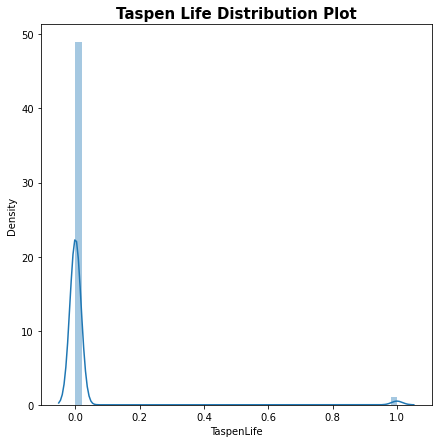

In [24]:
# Plot distribusi fitur 'TaspenLife'
plt.figure(figsize=(7, 7))
sns.distplot(df['TaspenLife'])
plt.title('Taspen Life Distribution Plot', size=15, weight='bold');

Berdasarkan plot distribusi kelas 0 dan 1 produk `Taspen_Lofe` di atas, terlihat persebaran data yang extremely imbalance.

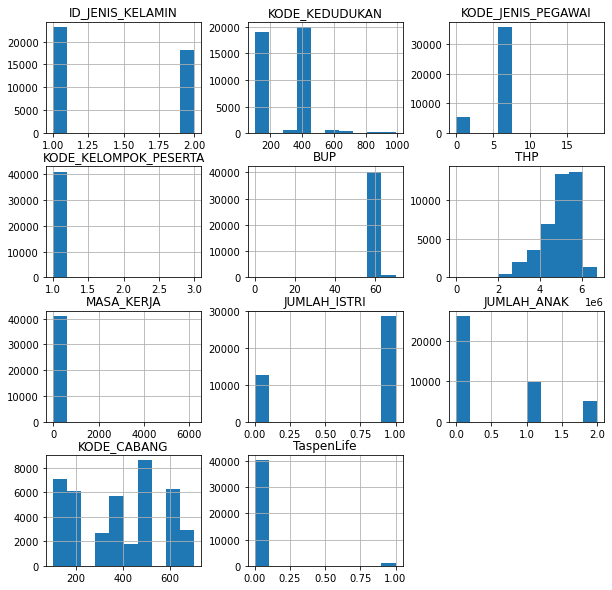

In [25]:
df.hist(figsize=(10, 10));

/Users/iqbaltanjung/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


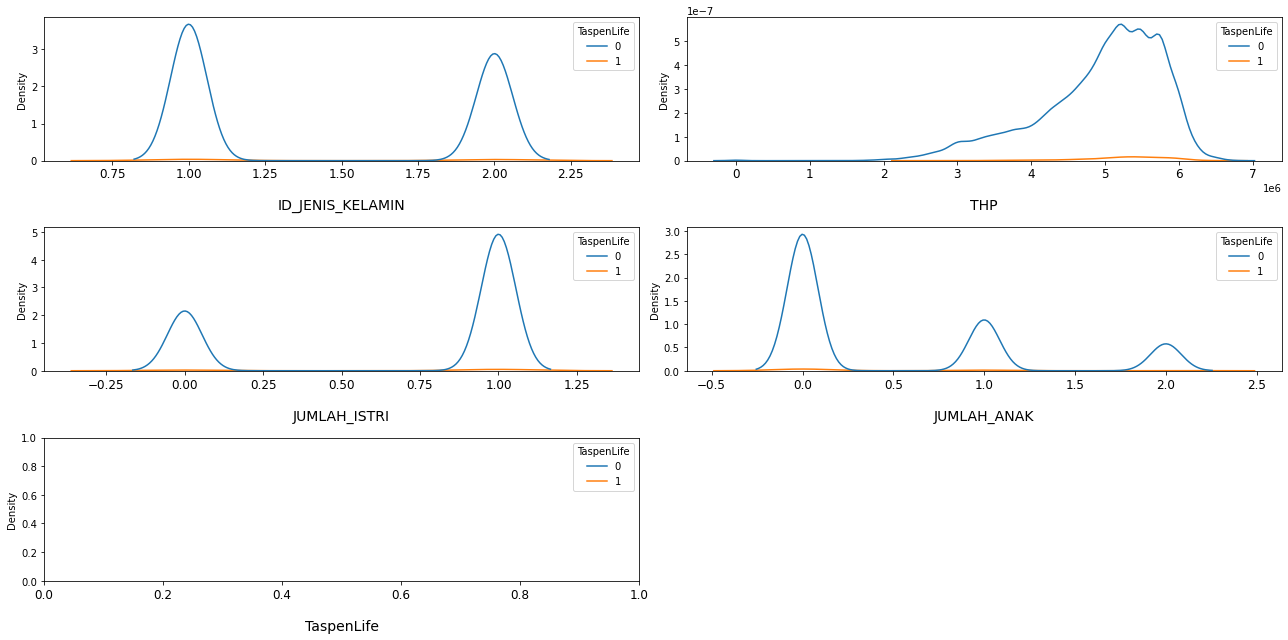

In [26]:
fig, ax = plt.subplots(2,2, figsize=(18, 9))

count = 1

for i in df.columns[((df.dtypes == 'int64') | (df.dtypes == 'float64')) & 
~df.columns.isin(['KODE_KEDUDUKAN','KODE_JENIS_PEGAWAI','KODE_KELOMPOK_PESERTA','BUP','MASA_KERJA','KODE_CABANG'])]:
    plt.subplot(3, 2, count)
    sns.kdeplot(x=df[i], hue=df['TaspenLife'])
    plt.xlabel(i, fontsize=14, labelpad=18)
    plt.xticks(fontsize=12)
    count += 1


fig.tight_layout();

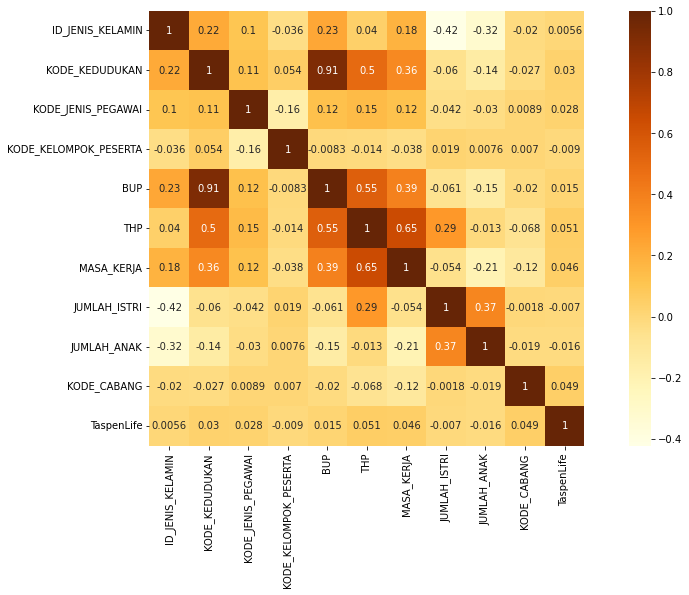

In [27]:
corr = df.corr(method='spearman')
plt.figure(figsize = (16, 8))
sns.heatmap(corr,
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot=True,
            cmap='YlOrBr', 
            square=True);

`Drop Feature`


Feature yang tidak relevan untuk digunakan dalam tahapan selanjutnya adalah TGL_KLAIM, TGL_POSTING, TGL_LAHIR, TGL_KERJA, TMT_TASPEN, KODE_PANGKAT, KODE_KEDUDUKAN, KODE_JENIS_PEGAWAI, KODE_KELOMPOK_PESERTA, TGL_PMK, MASA_KERJA dan KODE_CABANG. Feature ini akan di-drop, guna memudahkan proses selanjutnya. 


Sedangkan untuk Feature ID_PESERTA tidak perlu dihapuskan karena dapat mengakibatkan pembacaan data menjadi duplikasi. 

In [28]:
df = df.drop(['TGL_POSTING', 'TGL_KLAIM', 'TGL_LAHIR', 'TMT_KERJA', 'TMT_TASPEN', 'KODE_JENIS_PEGAWAI', 
               'KODE_KELOMPOK_PESERTA', 'KODE_KEDUDUKAN', 'KODE_PANGKAT','TGLPMK','KODE_KELOMPOK_PESERTA','MASA_KERJA','KODE_CABANG'], axis=1)

In [29]:
df.head(5)

,ID_PESERTA,KODE_JENIS_KLAIM,ID_JENIS_KELAMIN,BUP,THP,JUMLAH_ISTRI,JUMLAH_ANAK,TaspenLife
5,A84645316F97425C1700B06CFB291994,C1,1,60,5332030,1,0,0
27,F62744316F97425C1700B06CFB291994,C1,1,60,5011380,1,0,0
31,3FE11F316F97425C1700B06CFB291994,C1,1,60,5193612,1,2,0
50,01B03E316F97425C1700B06CFB291994,C1,1,60,4732254,1,2,0
51,514EEC316F97425C1700B06CFB291994,B1,1,60,4281800,0,0,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41200 entries, 5 to 138134
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID_PESERTA        41200 non-null  object
 1   KODE_JENIS_KLAIM  41200 non-null  object
 2   ID_JENIS_KELAMIN  41200 non-null  int64 
 3   BUP               41200 non-null  int64 
 4   THP               41200 non-null  int64 
 5   JUMLAH_ISTRI      41200 non-null  int64 
 6   JUMLAH_ANAK       41200 non-null  int64 
 7   TaspenLife        41200 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 3.8+ MB


`Duplicated Records`


Selanjutnya perlu dilakukan pengecekan terhadap duplicate data. Nantinya, bila ditemukan duplikasi data akan dilakukan perbaikan dengan drop duplicate rows. 

In [31]:
df.shape

(41200, 8)

In [32]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows : ", duplicate_rows_df.shape)

number of duplicate rows :  (143, 8)


In [33]:
df = df.drop_duplicates()
df.head(5)

,ID_PESERTA,KODE_JENIS_KLAIM,ID_JENIS_KELAMIN,BUP,THP,JUMLAH_ISTRI,JUMLAH_ANAK,TaspenLife
5,A84645316F97425C1700B06CFB291994,C1,1,60,5332030,1,0,0
27,F62744316F97425C1700B06CFB291994,C1,1,60,5011380,1,0,0
31,3FE11F316F97425C1700B06CFB291994,C1,1,60,5193612,1,2,0
50,01B03E316F97425C1700B06CFB291994,C1,1,60,4732254,1,2,0
51,514EEC316F97425C1700B06CFB291994,B1,1,60,4281800,0,0,0


In [34]:
df.count()

ID_PESERTA          41057
KODE_JENIS_KLAIM    41057
ID_JENIS_KELAMIN    41057
BUP                 41057
THP                 41057
JUMLAH_ISTRI        41057
JUMLAH_ANAK         41057
TaspenLife          41057
dtype: int64

Dari 41.200 data menjadi 41.057 akibat dari proses drop sebanyak 143 baris yang memiliki nilai duplikat.

`Missing Values or Null Values`


Menghapus data yang 'kosong'

In [35]:
print(df.isnull().sum())

ID_PESERTA          0
KODE_JENIS_KLAIM    0
ID_JENIS_KELAMIN    0
BUP                 0
THP                 0
JUMLAH_ISTRI        0
JUMLAH_ANAK         0
TaspenLife          0
dtype: int64


Namun tidak ditemukan data kosong dalam dataset sehingga tidak perlu dilakuan cleaning. 

`Outliers`


Selanjutnya mengidentifikasi nilai pencilan (outlier).

Pertama, melihat outlier pada kolom THP dengan grafik berikut :

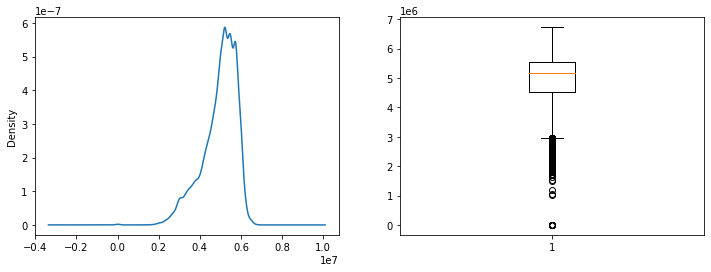

In [36]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
df['THP'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(df['THP'])
plt.show()

Mengidentifikasi outlier dengan Interquartile Range (IQR)

In [37]:
# Outliers identification per feature
def outliers(df, numerical):
    '''
    Returns a list of all records of outliers index.
    '''
    
    q1 = df[numerical].quantile(0.25)
    q2 = df[numerical].quantile(0.5)
    q3 = df[numerical].quantile(0.75)

    iqr = q3 - q1
    bounds = df[(df[numerical] < (q1 - (1.5 * iqr))) | (df[numerical] > (q3 + (1.5 * iqr)))].index
   
    return df.loc[bounds]

Outlier akan teridentifikasi apabila bernilai 

kurang dari Q1 - 1.5(Q3-Q1) dan

lebih dari Q3 + 1.5(Q3-Q1)

In [38]:
df_outlier = outliers(df, 'THP')
df_outlier

,ID_PESERTA,KODE_JENIS_KLAIM,ID_JENIS_KELAMIN,BUP,THP,JUMLAH_ISTRI,JUMLAH_ANAK,TaspenLife
1694,FF94F6316F97425C1700B06CFB291994,B1,1,58,2858240,1,1,0
1697,68C12E316F97425C1700B06CFB291994,B1,1,58,2909280,0,2,0
1716,81E1E5316F97425C1700B06CFB291994,C1,1,58,1956300,0,0,0
1996,A056E2316F97425C1700B06CFB291994,B1,1,60,2247168,1,1,0
2126,C16EDF316F97425C1700B06CFB291994,C1,1,58,2889800,0,0,0
...,...,...,...,...,...,...,...,...
138118,054433316F97425C1700B06CFB291994,B1,1,0,2100000,0,0,0
138121,EA99F9316F97425C1700B06CFB291994,B1,1,0,2394000,1,2,0
138129,241CB5316F97425C1700B06CFB291994,B1,1,0,2310000,1,0,0
138131,C00427316F97425C1700B06CFB291994,B1,2,0,2142000,0,1,0


Terdapat 1.052 data pencilan.

In [39]:
df_outlier['THP'].max()

2956580

Kelompok 4 memeriksa dari seluruh data outlier berapa di antaranya yang mengambil polis.

In [40]:
df_outlier[df_outlier['TaspenLife'] == 1.0]

,ID_PESERTA,KODE_JENIS_KLAIM,ID_JENIS_KELAMIN,BUP,THP,JUMLAH_ISTRI,JUMLAH_ANAK,TaspenLife
16115,964A28316F97425C1700B06CFB291994,B1,1,58,2864950,1,0,1
30642,429823316F97425C1700B06CFB291994,B1,1,58,2955150,1,0,1
58887,A8BFF7316F97425C1700B06CFB291994,B1,1,58,2583350,1,0,1


In [41]:
df.describe()

,ID_JENIS_KELAMIN,BUP,THP,JUMLAH_ISTRI,JUMLAH_ANAK,TaspenLife
count,41057.000000,41057.000000,4.105700e+04,41057.000000,41057.000000,41057.000000
mean,1.440680,59.075700,4.960522e+06,0.694766,0.484205,0.021726
std,0.496475,2.949087,8.310488e+05,0.460512,0.704933,0.145789
min,1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,1.000000,58.000000,4.517700e+06,0.000000,0.000000,0.000000
50%,1.000000,60.000000,5.154688e+06,1.000000,0.000000,0.000000
75%,2.000000,60.000000,5.557530e+06,1.000000,1.000000,0.000000
max,2.000000,70.000000,6.727368e+06,1.000000,2.000000,1.000000


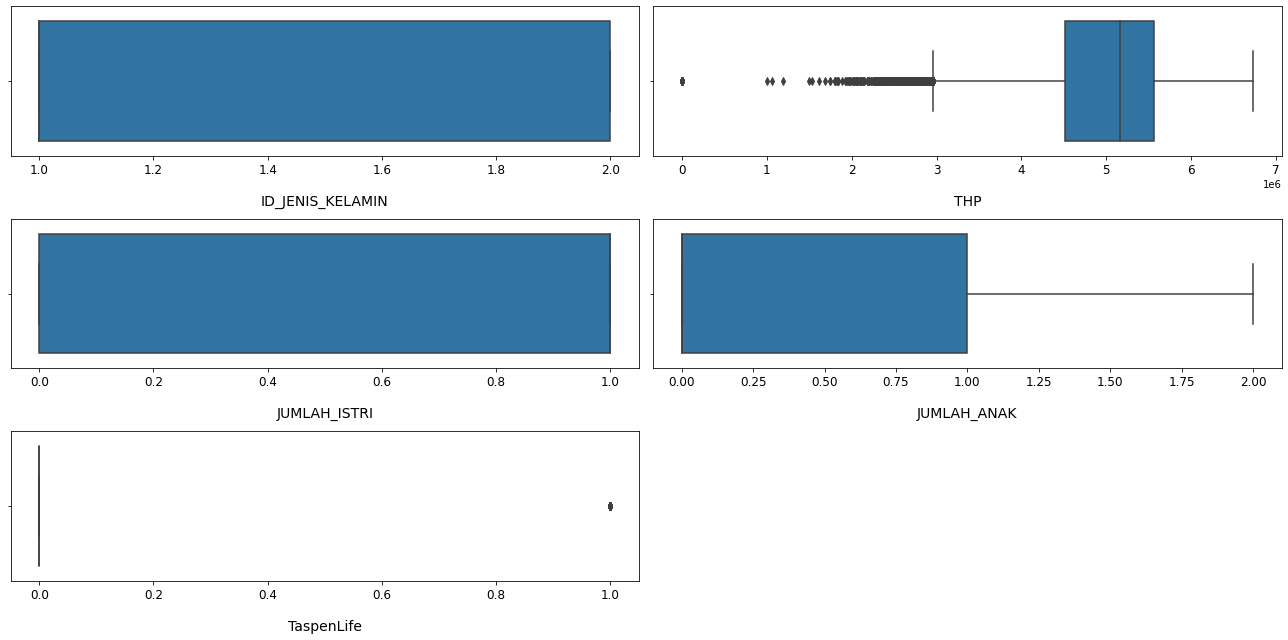

In [42]:
fig, ax = plt.subplots(2,2, figsize=(18, 9))

count = 1

for i in df.columns[((df.dtypes == 'int64') | (df.dtypes == 'float64')) & 
~df.columns.isin(['KODE_KEDUDUKAN','KODE_JENIS_PEGAWAI','KODE_KELOMPOK_PESERTA','BUP','MASA_KERJA','KODE_CABANG'])]:
    plt.subplot(3,2, count)
    sns.boxplot(x=df[i])
    plt.xlabel(i, fontsize=14, labelpad=18)
    plt.xticks(fontsize=12)
    count += 1

    ax[1,1].set_axis_off()
    ax[1,1].set_axis_off()

fig.tight_layout();

Terdapat nilai outlier di Feature THP, untuk itu dilakukan evaluasi lebih mendalam terhadap data di feature THP. 

In [43]:
df.THP.describe()

count    4.105700e+04
mean     4.960522e+06
std      8.310488e+05
min      0.000000e+00
25%      4.517700e+06
50%      5.154688e+06
75%      5.557530e+06
max      6.727368e+06
Name: THP, dtype: float64

<AxesSubplot:xlabel='THP'>

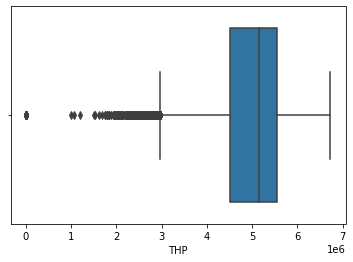

In [44]:
sns.boxplot(x=df['THP'])

In [45]:
df['THP'].unique()

array([5332030, 5011380, 5193612, ..., 2016000, 2100000, 2052000])

In [46]:
df = df[df['THP'] > 2926770 ]

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40118 entries, 5 to 138134
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID_PESERTA        40118 non-null  object
 1   KODE_JENIS_KLAIM  40118 non-null  object
 2   ID_JENIS_KELAMIN  40118 non-null  int64 
 3   BUP               40118 non-null  int64 
 4   THP               40118 non-null  int64 
 5   JUMLAH_ISTRI      40118 non-null  int64 
 6   JUMLAH_ANAK       40118 non-null  int64 
 7   TaspenLife        40118 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 2.8+ MB


<AxesSubplot:xlabel='THP'>

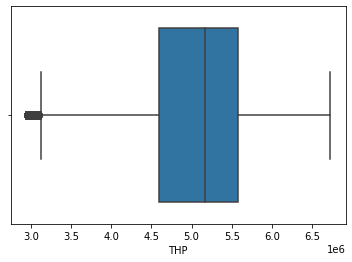

In [48]:
sns.boxplot(x=df['THP'])

In [49]:
# coba diplot ulang
# sns.boxplot(x=df['THP'])

Text(0.5, 0, 'THP')

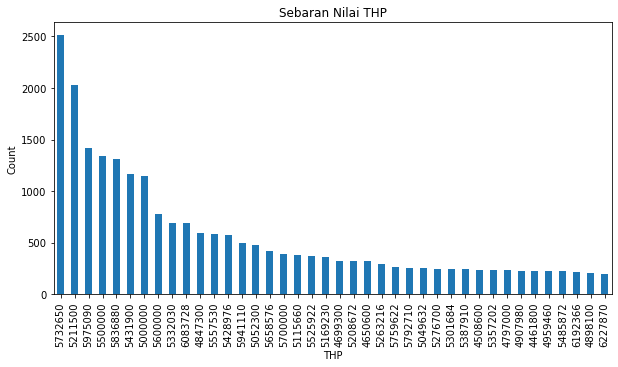

In [50]:
df.THP.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title('Sebaran Nilai THP')
plt.ylabel('Count')
plt.xlabel('THP')


In [51]:
preview(df)

,Features,DataType,Null,Proportion,Uniques,UniqueSample
0,ID_PESERTA,object,0,0.0,40101,"[A84645316F97425C1700B06CFB291994, F62744316F9..."
1,KODE_JENIS_KLAIM,object,0,0.0,2,"[C1, B1]"
2,ID_JENIS_KELAMIN,int64,0,0.0,2,"[1, 2]"
3,BUP,int64,0,0.0,7,"[60, 65, 70, 62, 58, 67, 0]"
4,THP,int64,0,0.0,791,"[5332030, 5011380, 5193612, 4732254, 4281800, ..."
5,JUMLAH_ISTRI,int64,0,0.0,2,"[1, 0]"
6,JUMLAH_ANAK,int64,0,0.0,3,"[0, 2, 1]"
7,TaspenLife,int64,0,0.0,2,"[0, 1]"


Dari 41.057 data menjadi 40.118 akibat dari proses drop outlier.

In [52]:
df['TaspenLife'].value_counts(normalize=True)

0    0.977815
1    0.022185
Name: TaspenLife, dtype: float64

`Data Inconsistencies`

    Categorical

In [53]:
df

,ID_PESERTA,KODE_JENIS_KLAIM,ID_JENIS_KELAMIN,BUP,THP,JUMLAH_ISTRI,JUMLAH_ANAK,TaspenLife
5,A84645316F97425C1700B06CFB291994,C1,1,60,5332030,1,0,0
27,F62744316F97425C1700B06CFB291994,C1,1,60,5011380,1,0,0
31,3FE11F316F97425C1700B06CFB291994,C1,1,60,5193612,1,2,0
50,01B03E316F97425C1700B06CFB291994,C1,1,60,4732254,1,2,0
51,514EEC316F97425C1700B06CFB291994,B1,1,60,4281800,0,0,0
...,...,...,...,...,...,...,...,...
137792,5B6BFE316F97425C1700B06CFB291994,B1,1,58,5836880,1,0,0
137798,5F97F1316F97425C1700B06CFB291994,C1,2,0,4200000,0,0,0
137812,7CE8FB316F97425C1700B06CFB291994,B1,1,0,3300000,1,0,0
137813,159638316F97425C1700B06CFB291994,B1,1,0,3300000,1,0,0


In [54]:
for i in [feature for feature in df.columns if ((df[feature].dtypes == 'object') & (feature not in ['ID_PESERTA']))]:
    print(i, '\n')
    print(df[i].unique().tolist(), '\n')


KODE_JENIS_KLAIM 

['C1', 'B1'] 



    Numerical

In [55]:
for i in df.columns[df.dtypes == 'int64']:
    print(i, '\n')
    print(df[i].unique().tolist(), '\n')

ID_JENIS_KELAMIN 

[1, 2] 

BUP 

[60, 65, 70, 62, 58, 67, 0] 

THP 

[5332030, 5011380, 5193612, 4732254, 4281800, 4946704, 5102496, 5428976, 6227870, 5661700, 5431900, 6083728, 4847300, 5500000, 4881252, 5732650, 5557530, 6491320, 5444340, 4463000, 4136946, 6341104, 6003354, 5583834, 5000000, 6727368, 6147456, 5975090, 3941400, 5792710, 5139804, 4807990, 4895408, 4797000, 5901200, 5853320, 5543022, 4461800, 5052300, 5941110, 4938440, 5658576, 4898100, 5836880, 6521940, 6609344, 6293100, 4193500, 4508600, 5208672, 4959460, 5049632, 5468580, 4699300, 5700000, 5540538, 5263216, 4844672, 5035038, 5387910, 5413290, 5211500, 5600000, 5100000, 5169230, 5266100, 5543328, 6037680, 5820042, 5488800, 4151100, 4416700, 4795616, 5525922, 5470062, 4798300, 5717936, 5898032, 4759370, 4997216, 4335540, 6192366, 5115660, 5372640, 4650600, 5087820, 4748500, 5276700, 4237500, 4830750, 4781844, 3901500, 4024400, 5086452, 5301684, 5759622, 4493196, 4602400, 5062640, 4907980, 4758160, 6257232, 5485872, 47

`Cleaned Data`

**Types of Property Related to Taspen Life**


Dimana data yang berpengaruh terhadap Taspen Life adalah jenis kelamin, BUP, THP, jumlah istri dan jumlah anak.

In [56]:
df_temp=df.dropna()

In [57]:
df_temp[['KODE_JENIS_KLAIM', 'TaspenLife']]
ct_preferred = pd.crosstab(df_temp['KODE_JENIS_KLAIM'], df_temp['TaspenLife'])
ct_preferred

TaspenLife,0,1
KODE_JENIS_KLAIM,,
B1,33943,887
C1,5285,3


In [58]:
B1_0 = round(33943/(33943+887) * 100, 2)
B1_1 = round(887/(33943+887) * 100, 2)

C1_0 = round(5285/(5285+3) * 100, 2)
C1_1 = round(3/(5285+3) * 100, 2)

df_klaim = pd.DataFrame({
    'Tidak': [B1_0, C1_0],
    'TaspenLife': [B1_1, C1_1]},
    index=['B1', 'C1']
)

df_klaim

,Tidak,TaspenLife
B1,97.45,2.55
C1,99.94,0.06


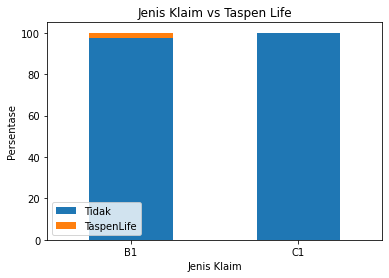

In [59]:
df_klaim.plot(kind='bar', stacked=True)
plt.title('Jenis Klaim vs Taspen Life')
plt.xlabel('Jenis Klaim')
plt.ylabel('Persentase')
plt.xticks(rotation=0);

Jenis Klaim vs Taspen Life, menggambarkan bahwa peserta yang mengajukan klaim B1 (klaim pensiun) lebih tertarik untuk membeli produk Taspen Life

In [60]:
df_temp[['ID_JENIS_KELAMIN', 'TaspenLife']]
ct_preferred = pd.crosstab(df_temp['ID_JENIS_KELAMIN'], df_temp['TaspenLife'])
ct_preferred

TaspenLife,0,1
ID_JENIS_KELAMIN,,
1,21747,480
2,17481,410


In [61]:
pria_0 = round(21747/(21747+480) * 100, 2)
pria_1 = round(480/(21747+480) * 100, 2)

wanita_0 = round(17481/(17481+410) * 100, 2)
wanita_1 = round(410/(17481+410) * 100, 2)

df_jenkel = pd.DataFrame({
    'Tidak': [pria_0, wanita_0],
    'TaspenLife': [pria_1, wanita_1]},
    index=['Pria', 'Wanita']
)

df_jenkel

,Tidak,TaspenLife
Pria,97.84,2.16
Wanita,97.71,2.29


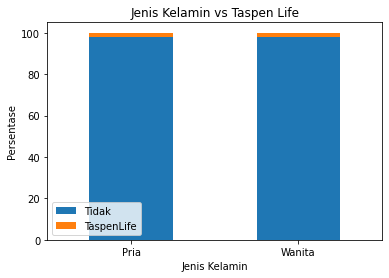

In [62]:
df_jenkel.plot(kind='bar', stacked=True)
plt.title('Jenis Kelamin vs Taspen Life')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Persentase')
plt.xticks(rotation=0);

Jenis Kelamin vs Taspen Life, menggambarkan:
> - Peserta perempuan lebih meminati untuk menambah produk Taspen Life
> - Meskipun peserta laki-laki juga meminati untuk bergabung manmbah manfaat melalui produk Taspen Life

In [63]:
df_temp[['BUP', 'TaspenLife']]
ct_preferred = pd.crosstab(df_temp['BUP'], df_temp['TaspenLife'])
ct_preferred

TaspenLife,0,1
BUP,,
0,3,0
58,17861,355
60,20444,533
62,82,0
65,719,2
67,42,0
70,77,0


In [64]:
# sns.catplot(x='BUP', kind='count', hue='TaspenLife', data=df);
# plt.title('BUP vs Taspen Life');

bup_0_0 = round(3/(3+0) * 100, 2)
bup_58_0 = round(17861/(17861+355) * 100, 2)
bup_60_0 = round(20444/(20444+533) * 100, 2)
bup_62_0 = round(82/(82+0) * 100, 2)
bup_65_0 = round(719/(719+2) * 100, 2)
bup_67_0 = round(42/(42+0) * 100, 2)
bup_70_0 = round(77/(77+0) * 100, 2)

bup_0_1 = round(0/(3+0) * 100, 2)
bup_58_1 = round(355/(17861+355) * 100, 2)
bup_60_1 = round(533/(20444+533) * 100, 2)
bup_62_1 = round(0/(82+0) * 100, 2)
bup_65_1 = round(2/(719+2) * 100, 2)
bup_67_1 = round(0/(42+0) * 100, 2)
bup_70_1 = round(0/(77+0) * 100, 2)

df_bup = pd.DataFrame({
    'Tidak': [bup_0_0, bup_58_0, bup_60_0,bup_62_0,bup_65_0,bup_67_0,bup_70_0],
    'TaspenLife': [bup_0_1, bup_58_1, bup_60_1,bup_62_1,bup_65_1,bup_67_1,bup_70_1]},
    index=['0', '58','60','62','65','67','70']
)

df_bup

,Tidak,TaspenLife
0,100.00,0.00
58,98.05,1.95
60,97.46,2.54
62,100.00,0.00
65,99.72,0.28
67,100.00,0.00
70,100.00,0.00


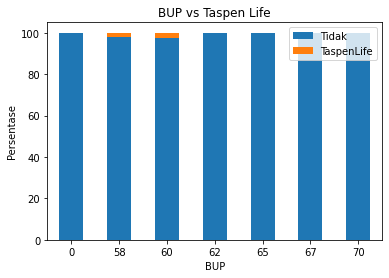

In [65]:
df_bup.plot(kind='bar', stacked=True)
plt.title('BUP vs Taspen Life')
plt.xlabel('BUP')
plt.ylabel('Persentase')
plt.xticks(rotation=0);

BUP vs Taspen Life, menggambarkan:
> Umur 58 dan 60 tahun paling banyak mengikuti program manfaat proteksi tambahan.

In [66]:
df_temp[['THP', 'TaspenLife']]
ct_preferred = pd.crosstab(df_temp['THP'], df_temp['TaspenLife'])
ct_preferred

TaspenLife,0,1
THP,,
2938350,4,0
2939832,25,0
2940516,1,0
2947596,3,0
2948288,8,0
...,...,...
6454338,34,1
6491320,68,0
6521940,2,0


In [67]:
df_thp = pd.cut(df_temp['THP'],5)
df_thp

5           (5211760.8, 5969564.4]
27          (4453957.2, 5211760.8]
31          (4453957.2, 5211760.8]
50          (4453957.2, 5211760.8]
51          (3696153.6, 4453957.2]
                    ...           
137792      (5211760.8, 5969564.4]
137798      (3696153.6, 4453957.2]
137812    (2934560.982, 3696153.6]
137813    (2934560.982, 3696153.6]
138134      (5211760.8, 5969564.4]
Name: THP, Length: 40118, dtype: category
Categories (5, interval[float64, right]): [(2934560.982, 3696153.6] < (3696153.6, 4453957.2] < (4453957.2, 5211760.8] < (5211760.8, 5969564.4] < (5969564.4, 6727368.0]]

Karena range data THP terlalu besar, maka penulis memutuskan untuk membaginya ke dalam 5 kategori

In [68]:
df_temp[['THP', 'TaspenLife']]
ct_preferred = pd.crosstab(df_thp, df_temp['TaspenLife'])
ct_preferred

TaspenLife,0,1
THP,,
"(2934560.982, 3696153.6]",2968,20
"(3696153.6, 4453957.2]",5393,68
"(4453957.2, 5211760.8]",13875,297
"(5211760.8, 5969564.4]",14169,400
"(5969564.4, 6727368.0]",2823,105


In [69]:
thp_1_0 = round(2968/(2968+20) * 100, 2)
thp_2_0 = round(5393/(5393+68) * 100, 2)
thp_3_0 = round(13875/(13875+297) * 100, 2)
thp_4_0 = round(14169/(14169+400) * 100, 2)
thp_5_0 = round(2823/(2823+105) * 100, 2)


thp_1_1 = round(20/(2968+20) * 100, 2)
thp_2_1 = round(68/(5393+68) * 100, 2)
thp_3_1 = round(297/(13875+297) * 100, 2)
thp_4_1 = round(400/(14169+400) * 100, 2)
thp_5_1 = round(105/(2823+105) * 100, 2)

df_thp = pd.DataFrame({
    'Tidak': [thp_1_0, thp_2_0, thp_3_0,thp_4_0,thp_5_0],
    'TaspenLife': [thp_1_1, thp_2_1, thp_3_1,thp_4_1,thp_5_1]},
    index=['2934560.982 - 3696153.6', '3696153.6 - 4453957.2','4453957.2 - 5211760.8','5211760.8 - 5969564.4','5969564.4 - 6727368.0']
)

df_thp

,Tidak,TaspenLife
2934560.982 - 3696153.6,99.33,0.67
3696153.6 - 4453957.2,98.75,1.25
4453957.2 - 5211760.8,97.90,2.10
5211760.8 - 5969564.4,97.25,2.75
5969564.4 - 6727368.0,96.41,3.59


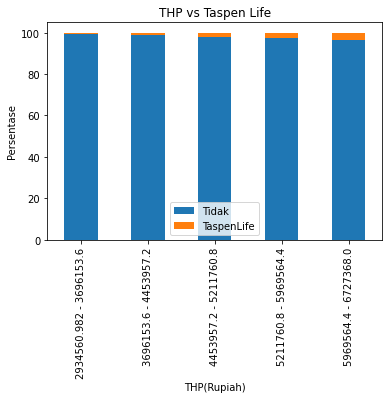

In [70]:
df_thp.plot(kind='bar', stacked=True)
plt.title('THP vs Taspen Life')
plt.xlabel('THP(Rupiah)')
plt.ylabel('Persentase')
plt.xticks(rotation=90);

THP vs Taspen Life, menggambarkan peserta dengan jumlah penghasilan di atas Rp5.200.000 paling banyak mengikuti program manfaat proteksi tambahan, hal ini terlihat dari:
> - Sebanyak 2.75% peserta dengan range THP Rp5.211.760,8 - Rp5.969.564,4 membeli produk Taspen Life
> - Sebanyak 3.59% peserta dengan range THP Rp5.969.564,4 - Rp.6.727.368 membeli produk Taspen Life


In [71]:
df_temp[['JUMLAH_ISTRI', 'TaspenLife']]
ct_preferred = pd.crosstab(df_temp['JUMLAH_ISTRI'], df_temp['TaspenLife'])
ct_preferred

TaspenLife,0,1
JUMLAH_ISTRI,,
0,11894,292
1,27334,598


In [72]:
istri_0_0 = round(11894/(11894+292) * 100, 2)
istri_0_1 = round(292/(11894+292) * 100, 2)

istri_1_0 = round(27334/(27334+598) * 100, 2)
istri_1_1 = round(598/(27334+598) * 100, 2)

df_istri = pd.DataFrame({
    'Tidak': [istri_0_0, istri_1_0],
    'TaspenLife': [istri_0_1, istri_1_1]},
    index=['0', '1']
)

df_istri

,Tidak,TaspenLife
0,97.60,2.40
1,97.86,2.14


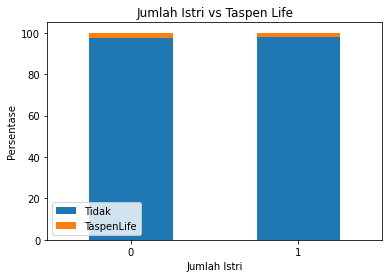

In [73]:
df_istri.plot(kind='bar', stacked=True)
plt.title('Jumlah Istri vs Taspen Life')
plt.xlabel('Jumlah Istri')
plt.ylabel('Persentase')
plt.xticks(rotation=0);

Jumlah Istri vs Taspen Life, menggambarkan:
> - Peserta yang memiliki istri lebih meminati untuk menambah manfaat melalui produk Taspen Life

In [74]:
df_temp[['JUMLAH_ANAK', 'TaspenLife']]
ct_preferred = pd.crosstab(df_temp['JUMLAH_ANAK'], df_temp['TaspenLife'])
ct_preferred

TaspenLife,0,1
JUMLAH_ANAK,,
0,25035,607
1,9331,212
2,4862,71


In [75]:
anak_0_0 = round(25035/(25035+292) * 100, 2)
anak_1_0 = round(9331/(9331+212) * 100, 2)
anak_2_0 = round(4862/(4862+71) * 100, 2)

anak_0_1 = round(607/(25035+607) * 100, 2)
anak_1_1 = round(212/(9331+212) * 100, 2)
anak_2_1 = round(71/(4862+71) * 100, 2)

df_anak = pd.DataFrame({
    'Tidak': [anak_0_0, anak_1_0,anak_2_0],
    'TaspenLife': [anak_0_1, anak_1_1,anak_2_1]},
    index=['0', '1','2']
)

df_anak

,Tidak,TaspenLife
0,98.85,2.37
1,97.78,2.22
2,98.56,1.44


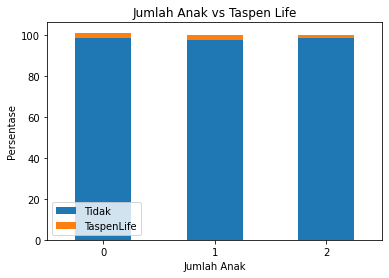

In [76]:
df_anak.plot(kind='bar', stacked=True)
plt.title('Jumlah Anak vs Taspen Life')
plt.xlabel('Jumlah Anak')
plt.ylabel('Persentase')
plt.xticks(rotation=0);

Jumlah Anak vs Taspen Life, menggambarkan:
> - Peserta yang tidak memiliki anak lebih meminati untuk menambah proteksi tambahan dari Taspen Life

Rangkuman keseluruhan

In [77]:
preview(df)

,Features,DataType,Null,Proportion,Uniques,UniqueSample
0,ID_PESERTA,object,0,0.0,40101,"[A84645316F97425C1700B06CFB291994, F62744316F9..."
1,KODE_JENIS_KLAIM,object,0,0.0,2,"[C1, B1]"
2,ID_JENIS_KELAMIN,int64,0,0.0,2,"[1, 2]"
3,BUP,int64,0,0.0,7,"[60, 65, 70, 62, 58, 67, 0]"
4,THP,int64,0,0.0,791,"[5332030, 5011380, 5193612, 4732254, 4281800, ..."
5,JUMLAH_ISTRI,int64,0,0.0,2,"[1, 0]"
6,JUMLAH_ANAK,int64,0,0.0,3,"[0, 2, 1]"
7,TaspenLife,int64,0,0.0,2,"[0, 1]"


`Bagaimana distribusi korelasi dari variabel numerik antara pesertang yang mengambil dan tidak mengambil polis Taspen_Life?`

In [78]:
columns = ['ID_JENIS_KELAMIN','THP','JUMLAH_ISTRI','JUMLAH_ANAK']

feature = []
pvalue = []
conclusion = []

for i in columns:
    feature.append(i)
    tstat, pval = shapiro(df_temp[i])
    pvalue.append(pval)

    # Conclusion
    if pval < 0.05 :
        conclusion.append('Reject H0')
    else :
        conclusion.append('Fail to reject H0')

pd.DataFrame(
                {
                 'Feature' : feature,
                 'p-Value' : pvalue,
                 'Conclusion' : conclusion
                }
            )

/Users/iqbaltanjung/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,Feature,p-Value,Conclusion
0,ID_JENIS_KELAMIN,0.0,Reject H0
1,THP,0.0,Reject H0
2,JUMLAH_ISTRI,0.0,Reject H0
3,JUMLAH_ANAK,0.0,Reject H0


Distribusi data dari numerical features tidak mennggambarkan distribusi normal. Untuk itu, menggunakan korelasi Spearman. 

In [79]:
df_temp.drop(['TaspenLife'], axis=1).corr(method='spearman')

,ID_JENIS_KELAMIN,BUP,THP,JUMLAH_ISTRI,JUMLAH_ANAK
ID_JENIS_KELAMIN,1.000000,0.223783,0.022110,-0.426637,-0.321816
BUP,0.223783,1.000000,0.534643,-0.063686,-0.151382
THP,0.022110,0.534643,1.000000,0.301262,-0.011871
JUMLAH_ISTRI,-0.426637,-0.063686,0.301262,1.000000,0.372086
JUMLAH_ANAK,-0.321816,-0.151382,-0.011871,0.372086,1.000000


In [80]:
df['TaspenLife'] = df['TaspenLife'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40118 entries, 5 to 138134
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID_PESERTA        40118 non-null  object
 1   KODE_JENIS_KLAIM  40118 non-null  object
 2   ID_JENIS_KELAMIN  40118 non-null  int64 
 3   BUP               40118 non-null  int64 
 4   THP               40118 non-null  int64 
 5   JUMLAH_ISTRI      40118 non-null  int64 
 6   JUMLAH_ANAK       40118 non-null  int64 
 7   TaspenLife        40118 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 2.8+ MB


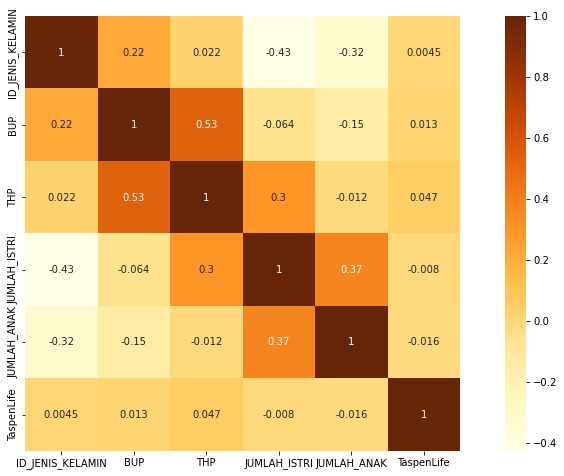

In [81]:
corr = df.corr(method='spearman')
plt.figure(figsize = (16, 8))
sns.heatmap(corr,
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot=True,
            cmap='YlOrBr', 
            square=True);

> - Positive Correlation tertinggi antara `THP` dan `BUP` dengan nilai sebesar 0.55. Nilai ini hanya sesuai dengan hubungan moderat yang terbaik. Ini masuk akal karena semakin lama bekerja dan pensiun, semakin besar pendapatan yang diterima oleh seorang peserta, dan hal ini mendukung untuk pengambilan keputusan penambahan manfaat dari Taspen Life. 

> - Positive Correlation tertinggi kedua adalah antara `JUMLAH_ISTRI` dan `JUMLAH_ANAK` dengan nilai sebesar 0.38. Semakin banyak jumlah anggota keluarga yang dimiliki, semakin besar keputusan peserta untuk memiliki penambahan manfaat dari Taspen Life. 

In [82]:
print(f"Jumlah jenis kelamin:\n{df['ID_JENIS_KELAMIN'].value_counts()}")

Jumlah jenis kelamin:
1    22227
2    17891
Name: ID_JENIS_KELAMIN, dtype: int64


,TaspenLife
ID_JENIS_KELAMIN,
1,0
2,0


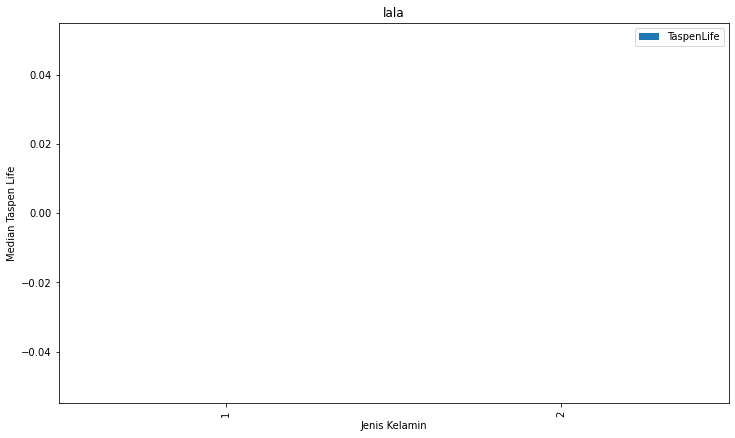

In [83]:
# Plot harga median untuk tiap tipe properti di setiap neighbourhood group
from IPython.display import display

jeniskelamin_pivot = df.pivot_table(index='ID_JENIS_KELAMIN', values='TaspenLife', aggfunc='median')
display(jeniskelamin_pivot)

pivot_plot = jeniskelamin_pivot.plot.bar(stacked=True, figsize=(12, 7))
pivot_plot.set_xlabel('Jenis Kelamin')
pivot_plot.set_ylabel('Median Taspen Life')
pivot_plot.set_title('lala');

In [84]:
print(f"Jumlah Istri:\n{df['JUMLAH_ISTRI'].value_counts()}")

Jumlah Istri:
1    27932
0    12186
Name: JUMLAH_ISTRI, dtype: int64


In [85]:
print(f"Jumlah Anak:\n{df['JUMLAH_ANAK'].value_counts()}")

Jumlah Anak:
0    25642
1     9543
2     4933
Name: JUMLAH_ANAK, dtype: int64


,THP
JUMLAH_ANAK,
0,5169230
1,5263216
2,4982826


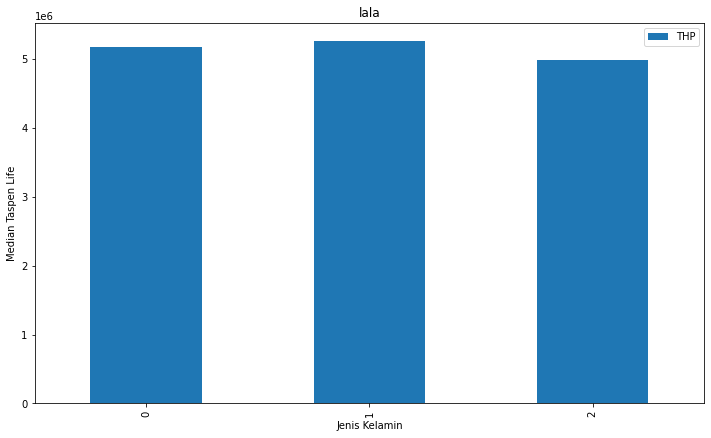

In [86]:
from IPython.display import display

jumlahanak_pivot = df.pivot_table(index='JUMLAH_ANAK', values='THP', aggfunc='median')
display(jumlahanak_pivot)

pivot_plot = jumlahanak_pivot.plot.bar(stacked=True, figsize=(12, 7))
pivot_plot.set_xlabel('Jenis Kelamin')
pivot_plot.set_ylabel('Median Taspen Life')
pivot_plot.set_title('lala');

In [87]:
print(f"Jumlah THP:\n{df['THP'].value_counts()}")

Jumlah THP:
5732650    2511
5211500    2025
5975090    1420
5500000    1344
5836880    1314
           ... 
4140864       1
3170608       1
3020600       1
4616600       1
5321200       1
Name: THP, Length: 791, dtype: int64


,TaspenLife
THP,
2938350,0.0
2939832,0.0
2940516,0.0
2947596,0.0
2948288,0.0
...,...
6454338,0.0
6491320,0.0
6521940,0.0


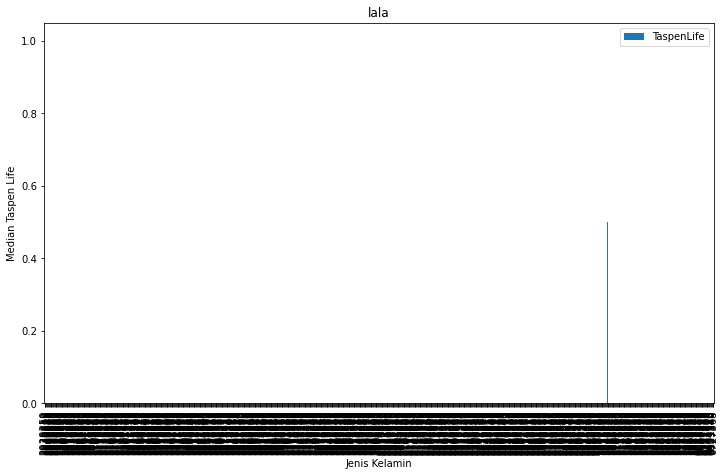

In [88]:
from IPython.display import display

jumlahanak_pivot = df.pivot_table(index='THP', values='TaspenLife', aggfunc='median')
display(jumlahanak_pivot)

pivot_plot = jumlahanak_pivot.plot.bar(stacked=True, figsize=(12, 7))
pivot_plot.set_xlabel('Jenis Kelamin')
pivot_plot.set_ylabel('Median Taspen Life')
pivot_plot.set_title('lala');

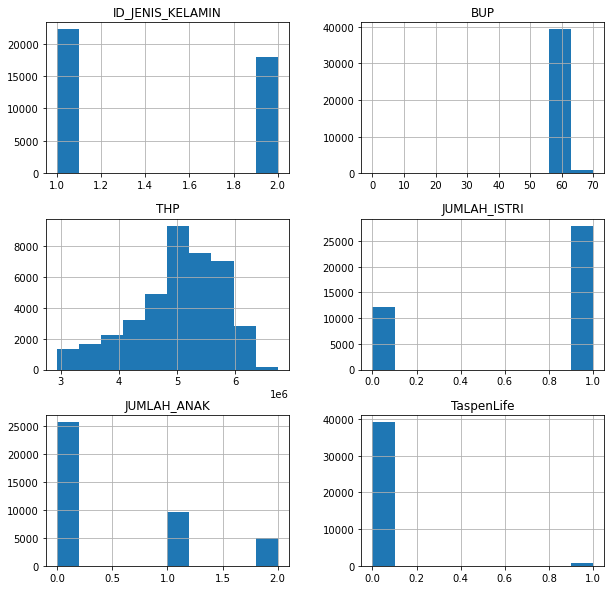

In [89]:
df.hist(figsize=(10, 10));

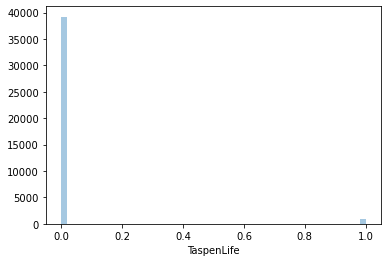

In [90]:
sns.distplot(df['TaspenLife'], kde=False);

In [91]:
# Preview of dataset
def preview(df):
    '''
    Returns a summary of attributes including dtype, proportion of missing values,
    number of unique values, and sample.
    '''
    
    df_check = []
    for i in df.columns:
        df_check .append([
                    i,
                    df[i].dtype,
                    df[i].isna().sum(),
                    round(df[i].isna().sum() / len(df) * 100, 2),
                    df[i].nunique(),
                    df[i].drop_duplicates().values])
        
    return pd.DataFrame(df_check, columns=['Features', 'DataType', 'Null', 'Proportion', 'Uniques', 'UniqueSample'])

In [92]:
preview(df)

,Features,DataType,Null,Proportion,Uniques,UniqueSample
0,ID_PESERTA,object,0,0.0,40101,"[A84645316F97425C1700B06CFB291994, F62744316F9..."
1,KODE_JENIS_KLAIM,object,0,0.0,2,"[C1, B1]"
2,ID_JENIS_KELAMIN,int64,0,0.0,2,"[1, 2]"
3,BUP,int64,0,0.0,7,"[60, 65, 70, 62, 58, 67, 0]"
4,THP,int64,0,0.0,791,"[5332030, 5011380, 5193612, 4732254, 4281800, ..."
5,JUMLAH_ISTRI,int64,0,0.0,2,"[1, 0]"
6,JUMLAH_ANAK,int64,0,0.0,3,"[0, 2, 1]"
7,TaspenLife,int64,0,0.0,2,"[0, 1]"


### Modeling ###

`Data Transformation`

**Schemas:**

1. Scaled using Standard Scaler
       
        BUP dan THP.

2. Encoded using OneHotEncoder
        
        KODE_JENIS_KLAIM.

4. No treatment
 
        ID_JENIS_KELAMIN, JUMLAH_ISTRI, JUMLAH ANAK.

In [93]:
df.columns.tolist()

['ID_PESERTA',
 'KODE_JENIS_KLAIM',
 'ID_JENIS_KELAMIN',
 'BUP',
 'THP',
 'JUMLAH_ISTRI',
 'JUMLAH_ANAK',
 'TaspenLife']

In [94]:
df.head()

,ID_PESERTA,KODE_JENIS_KLAIM,ID_JENIS_KELAMIN,BUP,THP,JUMLAH_ISTRI,JUMLAH_ANAK,TaspenLife
5,A84645316F97425C1700B06CFB291994,C1,1,60,5332030,1,0,0
27,F62744316F97425C1700B06CFB291994,C1,1,60,5011380,1,0,0
31,3FE11F316F97425C1700B06CFB291994,C1,1,60,5193612,1,2,0
50,01B03E316F97425C1700B06CFB291994,C1,1,60,4732254,1,2,0
51,514EEC316F97425C1700B06CFB291994,B1,1,60,4281800,0,0,0


In [95]:
# Preprocessing steps

# Encoding dilakukan agar fitur-fitur ini dapat dijadikan input dalam pemodelan (harus dalam bentuk numerik)
list_one_hot_encoder = ['KODE_JENIS_KLAIM']

# Robust scaler digunakan untuk menyamakan skala data pada tiap numerical features
list_standard_scaler = ['BUP', 'THP']                             

# Define semua process transformasi yang akan dilakukan, dibungkus di dalam sebuah column transformer
transformer = ColumnTransformer(
                                    [
                                        ('one_hot_encoder', OneHotEncoder(drop='first'), list_one_hot_encoder),
                                        ('robust_scaler', StandardScaler(), list_standard_scaler)
                                    ],
                                    remainder='passthrough' # untuk variable yang tidak dikenakan treatment (Complain)
                               )

    Data splitting

In [96]:
list_remainder = ['ID_JENIS_KELAMIN', 'JUMLAH_ISTRI', 'JUMLAH_ANAK']

input_vars = []
input_vars.extend(list_one_hot_encoder + list_standard_scaler + list_remainder) # The order of variables must align with the order of transformer

# Define X and y
# X = features yang akan digunakan untuk pemodelan
# y = target yang ingin diprediksi nilainya

X = df[input_vars]
y = df['TaspenLife']

In [97]:
input_vars

['KODE_JENIS_KLAIM',
 'BUP',
 'THP',
 'ID_JENIS_KELAMIN',
 'JUMLAH_ISTRI',
 'JUMLAH_ANAK']

In [98]:
# Data splitting
# Urutan variabel harus sama seperti ini
X_train, X_test, y_train, y_test = train_test_split(
                                                    X,
                                                    y,
                                                    stratify=y, # untuk menjaga proporsi antar kelas di target/label
                                                    test_size=0.2, 
                                                    random_state=42)

In [99]:
df_result = pd.DataFrame(transformer.fit_transform(X_train))
df_result.head()

,0,1,2,3,4,5
0,0.0,0.533651,0.720179,2.0,1.0,0.0
1,0.0,0.533651,-0.022718,2.0,0.0,0.0
2,0.0,0.533651,-0.573615,1.0,1.0,2.0
3,0.0,3.897824,0.092477,1.0,1.0,2.0
4,0.0,0.533651,0.643521,1.0,1.0,0.0


In [100]:
transformer.transformers_

[('one_hot_encoder', OneHotEncoder(drop='first'), ['KODE_JENIS_KLAIM']),
 ('robust_scaler', StandardScaler(), ['BUP', 'THP']),
 ('remainder', 'passthrough', [3, 4, 5])]

In [101]:
transformer.transformers_[0][1].get_feature_names()

array(['x0_C1'], dtype=object)

In [102]:
# Bisa digunakan untuk melihat hasil transformasi dalam bentuk DataFrame
# Atau digunakan untuk plot feature importances
feature_names = list(transformer.transformers_[0][1].get_feature_names()) + list_standard_scaler + list_remainder
feature_names

['x0_C1', 'BUP', 'THP', 'ID_JENIS_KELAMIN', 'JUMLAH_ISTRI', 'JUMLAH_ANAK']

In [103]:
df_result = pd.DataFrame(transformer.fit_transform(X_train), columns=feature_names)
df_result.head()

,x0_C1,BUP,THP,ID_JENIS_KELAMIN,JUMLAH_ISTRI,JUMLAH_ANAK
0,0.0,0.533651,0.720179,2.0,1.0,0.0
1,0.0,0.533651,-0.022718,2.0,0.0,0.0
2,0.0,0.533651,-0.573615,1.0,1.0,2.0
3,0.0,3.897824,0.092477,1.0,1.0,2.0
4,0.0,0.533651,0.643521,1.0,1.0,0.0


In [104]:
preview(df_result)

,Features,DataType,Null,Proportion,Uniques,UniqueSample
0,x0_C1,float64,0,0.0,2,"[0.0, 1.0]"
1,BUP,float64,0,0.0,7,"[0.5336512257645921, 3.8978237733365564, -0.81..."
2,THP,float64,0,0.0,747,"[0.7201788673644336, -0.022718052403414846, -0..."
3,ID_JENIS_KELAMIN,float64,0,0.0,2,"[2.0, 1.0]"
4,JUMLAH_ISTRI,float64,0,0.0,2,"[1.0, 0.0]"
5,JUMLAH_ANAK,float64,0,0.0,3,"[0.0, 2.0, 1.0]"


In [105]:
# Define models

# Classical machine learning algorithms
from tabnanny import verbose


logreg = LogisticRegression(random_state=42, solver='liblinear')
tree = DecisionTreeClassifier(random_state=42, max_depth=5)
knn = KNeighborsClassifier(n_neighbors=5)

# Ensemble models
# Voting classifier
base_models = [
    ('logreg', logreg),
    ('tree', tree),
    ('knn', knn)
]

voting_clf_hard = VotingClassifier(
    estimators=base_models,
    n_jobs=-1
)

voting_clf_soft = VotingClassifier(
    estimators=base_models,
    voting='soft',
    n_jobs=-1
)

# Stacking
stacking_logreg = StackingClassifier(
    estimators=base_models,
    final_estimator=logreg
)

stacking_tree = StackingClassifier(
    estimators=base_models,
    final_estimator=tree
)

# Bagging & Pasting
    # Bagging --> bootstrap sampling (sampling with replacement)
    # Pasting --> sampling without replacement

bagging_logreg = BaggingClassifier(
    base_estimator=logreg,
    n_estimators=10,
    bootstrap=True,
    random_state=42,
    oob_score=True
)

pasting_logreg = BaggingClassifier(
    base_estimator=logreg,
    n_estimators=10,
    bootstrap=False,
    random_state=42
)

# Random Forest
rf = RandomForestClassifier(
    random_state=42,
    max_depth=5
)

# Boosting models
ada_boost = AdaBoostClassifier(
    random_state=42
)

grad_boost = GradientBoostingClassifier(
    random_state=42,
    max_depth=5
)

xgboost = xgb.XGBClassifier(use_label_encoder=False, verbosity=0) # hyperparameter yang digunakan untuk menghilangkan warning

In [106]:
# Define imbalanced treatments
rus = RandomUnderSampler(random_state=42, sampling_strategy=0.8)
ros = RandomOverSampler(random_state=42, sampling_strategy=0.8)
smote = SMOTE(random_state=42, sampling_strategy=0.8)
smotenc = SMOTENC(categorical_features=np.array(range(0, 1)), random_state=42, sampling_strategy=0.8)
                    # categorical_features diisi dengan index kolom kategorikal berada (setelah dilakukan transformasi)
nearmiss = NearMiss(sampling_strategy=0.8)

# Define end-to-end pipeline
list_model = [logreg, tree, knn, voting_clf_soft, bagging_logreg,
                pasting_logreg, stacking_logreg, stacking_tree, rf, ada_boost, grad_boost, xgboost]
list_imb_treatment = [rus, ros, smote, smotenc, nearmiss]
score = []
mean_score = []
std_score = []

for i in list_model:
    for j in list_imb_treatment:
        skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        estimator = Pipeline([
            ('preprocessing', transformer),
            ('resampling', j),
            ('model', i)
        ])

        model_cv = cross_val_score(
                                    estimator, 
                                    X_train, 
                                    y_train, 
                                    cv=skfold,
                                    scoring='recall', 
                                    n_jobs=-1,
                                    error_score='raise'
                                )
        score.append(model_cv)
        mean_score.append(model_cv.mean())
        std_score.append(model_cv.std())

/Users/iqbaltanjung/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:747: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/Users/iqbaltanjung/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:747: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/Users/iqbaltanjung/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:753: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
/Users/iqbaltanjung/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:753: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
/Users/iqbaltanjung/opt/anaconda3/lib/python3.9/site-p

In [107]:
# Membuat list untuk setiap kombinasi antara model dan imbalanced treatment dengan bantuan itertools
import itertools

model_treatment = list(itertools.product([i.__class__.__name__ for i in list_model], [j.__class__.__name__ for j in list_imb_treatment]))
len(model_treatment)

60

In [108]:
# Menyiapkan bahan untuk kolom 'Model' pada DataFrame
list_models_name = ['logreg', 'tree', 'knn', 'voting_clf_soft', 'bagging_logreg',
                'pasting_logreg', 'stacking_logreg', 'stacking_tree', 'rf', 'ada_boost', 'grad_boost', 'xgboost']

# Agar tiap nama model ada repetisi sebanyak 5 kali (karena imbalanced treatments ada 5 variasi)
model_name = list(itertools.chain.from_iterable(itertools.repeat(x, 5) for x in [name for name in list_models_name]))
len(model_name)

60

In [109]:
# Buat DataFrame untuk menampilkan hasil
pd.DataFrame({
    'Model': model_name,
    'Model_treatment': model_treatment,
    'Recall_mean_score': mean_score,
    'Recall_std_score': std_score
}).sort_values(by='Recall_mean_score', ascending=False).reset_index(drop=True)

,Model,Model_treatment,Recall_mean_score,Recall_std_score
0,tree,"(DecisionTreeClassifier, SMOTE)",0.620890,0.160646
1,tree,"(DecisionTreeClassifier, SMOTENC)",0.605506,0.187923
2,grad_boost,"(GradientBoostingClassifier, NearMiss)",0.578509,0.042079
3,bagging_logreg,"(BaggingClassifier, SMOTENC)",0.571782,0.057684
4,logreg,"(LogisticRegression, SMOTE)",0.561932,0.057567
5,logreg,"(LogisticRegression, SMOTENC)",0.561932,0.057567
6,pasting_logreg,"(BaggingClassifier, SMOTE)",0.561932,0.057567
7,pasting_logreg,"(BaggingClassifier, SMOTENC)",0.561932,0.057567
8,xgboost,"(XGBClassifier, NearMiss)",0.561598,0.062659
9,stacking_tree,"(StackingClassifier, RandomUnderSampler)",0.560622,0.143121


Metode yang digunakan adalah Tree karena memiliki nilai Recall terbesar.

**Model performance (test set)**

In [110]:
estimator_tree = Pipeline([
    ('preprocess', transformer),
    ('resampling', smote),
    ('model', tree)
])

estimator_tree.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['KODE_JENIS_KLAIM']),
                                                 ('robust_scaler',
                                                  StandardScaler(),
                                                  ['BUP', 'THP'])])),
                ('resampling', SMOTE(random_state=42, sampling_strategy=0.8)),
                ('model',
                 DecisionTreeClassifier(max_depth=5, random_state=42))])

In [111]:
# Predict to X_test
y_pred_tree = estimator_tree.predict(X_test)

In [112]:
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.99      0.51      0.68      7846
           1       0.03      0.70      0.06       178

    accuracy                           0.52      8024
   macro avg       0.51      0.61      0.37      8024
weighted avg       0.97      0.52      0.66      8024



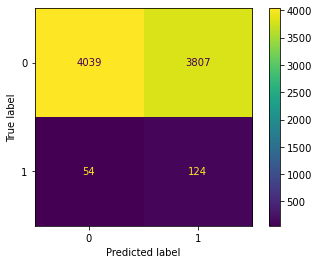

In [113]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_tree)

ConfusionMatrixDisplay(cm).plot();

In [114]:
hyperparam_space= {
    'model__min_samples_leaf': [1, 5, 10, 15, 20, 50], # benchmark 1
    'model__min_samples_split': [50, 100, 200],
    'model__max_depth': [5,6,7,8,9], # benchmark 5
    'model__criterion': ['entropy', 'gini'] # benchmark gini
}

In [115]:
# Hyperparameter tuning dengan menggunakan pipeline
estimator_tree_tuning = Pipeline([
    ('preprocessing', transformer),
    ('resampling', smote),
    ('model', tree)
])

# Define crossval
crossval = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi grid search
# Grid search digunakan untuk mencari dan mendapatkan kombinasi value terbaik dari tiap
    # hyperparameter yang kita define.
grid_search_tree = GridSearchCV(
    estimator_tree_tuning, # model to tune
    param_grid = hyperparam_space, # hyperparam space
    cv=crossval,
    scoring='recall', # metric
    return_train_score=True, # menampilkan hasil training tiap kombinasi
    n_jobs=-1
)

In [116]:
# Fitting data training untuk mencari nilai hyperparameter terbaik
grid_search_tree.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('one_hot_encoder',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['KODE_JENIS_KLAIM']),
                                                                        ('robust_scaler',
                                                                         StandardScaler(),
                                                                         ['BUP',
                                                                          'THP'])])),
                                       ('resampling',
                                        SMOTE(random_state=42,
                                              sampling_strategy=0.8)),
                                       ('model',
                                        DecisionTreeClassifier(max_depth=5,
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'model__criterion': ['entropy', 'gini'],
                         'model__max_depth': [5, 6, 7, 8, 9],
                         'model__min_samples_leaf': [1, 5, 10, 15, 20, 50],
                         'model__min_samples_split': [50, 100, 200]},
             return_train_score=True, scoring='recall')

In [117]:
# Cek hasil grid search
tuning_result = pd.DataFrame(grid_search_tree.cv_results_).sort_values(by='rank_test_score').head()
tuning_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__criterion,param_model__max_depth,param_model__min_samples_leaf,param_model__min_samples_split,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.054040,0.004445,0.009638,0.002197,entropy,5,1,50,"{'model__criterion': 'entropy', 'model__max_de...",0.711268,...,0.62089,0.160646,1,0.735088,0.570175,0.889279,0.513181,0.692982,0.680141,0.131826
106,0.047247,0.003979,0.008148,0.002395,gini,5,50,100,"{'model__criterion': 'gini', 'model__max_depth...",0.711268,...,0.62089,0.160646,1,0.735088,0.570175,0.889279,0.511424,0.692982,0.679790,0.132273
105,0.048392,0.004837,0.007840,0.002580,gini,5,50,50,"{'model__criterion': 'gini', 'model__max_depth...",0.711268,...,0.62089,0.160646,1,0.735088,0.570175,0.889279,0.511424,0.692982,0.679790,0.132273
104,0.051544,0.016645,0.006537,0.001461,gini,5,20,200,"{'model__criterion': 'gini', 'model__max_depth...",0.711268,...,0.62089,0.160646,1,0.735088,0.570175,0.889279,0.511424,0.692982,0.679790,0.132273
103,0.053983,0.008007,0.010589,0.005094,gini,5,20,100,"{'model__criterion': 'gini', 'model__max_depth...",0.711268,...,0.62089,0.160646,1,0.735088,0.570175,0.889279,0.511424,0.692982,0.679790,0.132273


In [118]:
# Cek nilai metric terbaik dan hyperparams value terbaik
print(grid_search_tree.best_score_)
print(grid_search_tree.best_params_)

0.6208903772284053
{'model__criterion': 'entropy', 'model__max_depth': 5, 'model__min_samples_leaf': 1, 'model__min_samples_split': 50}


**Before & after tuning comparison**

In [119]:
grid_search_tree.best_estimator_[2]

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=50,
                       random_state=42)

In [120]:
# Fitting ulang dengan hasil grid-search
best_model_tree = grid_search_tree.best_estimator_
best_model_tree.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['KODE_JENIS_KLAIM']),
                                                 ('robust_scaler',
                                                  StandardScaler(),
                                                  ['BUP', 'THP'])])),
                ('resampling', SMOTE(random_state=42, sampling_strategy=0.8)),
                ('model',
                 DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                        min_samples_split=50,
                                        random_state=42))])

In [121]:
# Predict to X_test menggunakan hasil tuning
y_pred_best_tree = best_model_tree.predict(X_test)

In [122]:
# Metrics before tuning
print(classification_report(y_test, y_pred_tree))


              precision    recall  f1-score   support

           0       0.99      0.51      0.68      7846
           1       0.03      0.70      0.06       178

    accuracy                           0.52      8024
   macro avg       0.51      0.61      0.37      8024
weighted avg       0.97      0.52      0.66      8024



In [123]:
# Metrics after tuning
print(classification_report(y_test, y_pred_best_tree))


              precision    recall  f1-score   support

           0       0.99      0.51      0.68      7846
           1       0.03      0.70      0.06       178

    accuracy                           0.52      8024
   macro avg       0.51      0.61      0.37      8024
weighted avg       0.97      0.52      0.66      8024



Precision: Dari seluruh peserta yang diprediksi model akan membeli polis, hanya 3% yang benar-benar membeli.

Recall: Dari seluruh peserta membeli polis, model hanya memprediksi dengan benar sebanyak 70%.

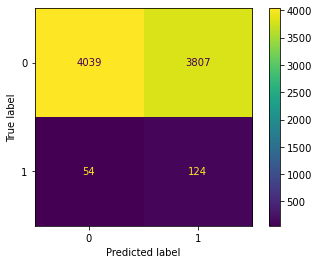

In [124]:
# Plot confusion matrix untuk penalized model
cm_tree_pen = confusion_matrix(y_test,  y_pred_best_tree)

ConfusionMatrixDisplay(cm_tree_pen).plot();

    - Setelah dilakukan hyperparameter tuning, performa model Tree tidak mengalami perubahan.
    - Hal ini bisa disebabkan salah satunya oleh pemilihan nilai hyperparameter yang kurang tepat. 

**Feature importance**

In [125]:
tree_imp = DecisionTreeClassifier(
    criterion='entropy', 
    max_depth=5, 
    min_samples_leaf=1, 
    min_samples_split=50
)

X_train_imp = transformer.fit_transform(X_train)
tree_imp.fit(X_train_imp, y_train)
tree_imp.feature_importances_

array([0.57125298, 0.05949558, 0.30583855, 0.00559567, 0.03896357,
       0.01885364])

In [126]:
feature_names

['x0_C1', 'BUP', 'THP', 'ID_JENIS_KELAMIN', 'JUMLAH_ISTRI', 'JUMLAH_ANAK']

In [127]:
df_imp = pd.DataFrame({
    'Feature':feature_names,
    'Importance':tree_imp.feature_importances_
    })

df_imp.sort_values(by='Importance', ascending=False)

,Feature,Importance
0,x0_C1,0.571253
2,THP,0.305839
1,BUP,0.059496
4,JUMLAH_ISTRI,0.038964
5,JUMLAH_ANAK,0.018854
3,ID_JENIS_KELAMIN,0.005596


## Conclusion

Melihat dari korelasi data Jenis Klaim dan THP yang berpengaruh terhadap pembelian polis Taspen Life dapat disimpulkan bahwa:​
- Peserta dengan jumlah penghasilan di atas Rp5.200.000 paling banyak mengikuti program manfaat proteksi tambahan, dan​
- Peserta yang mengajukan klaim B1 (klaim pensiun) lebih tertarik untuk membeli produk Taspen Life

## Recommendations

- Polis Taspen Life lebih tepat sasaran jika ditawarkan pada peserta yang mengajukan klaim Pensiun Pertama (B110) atau peserta yang mempunyai jumlah penghasilan di Rp5.200.000​
- Integrasi data Taspen dan Taspen Life agar data yang didapat aktual dan sesuai dengan keadaan di lapangan.​
- Memaksimalkan data penyebab kematian di aplikasi TDES, agar dapat menjadi dasar bagi Taspen Life jika ingin membuat program baru